https://www.salesanalytics.co.jp/datascience/datascience114/


<Axes: xlabel='Month'>

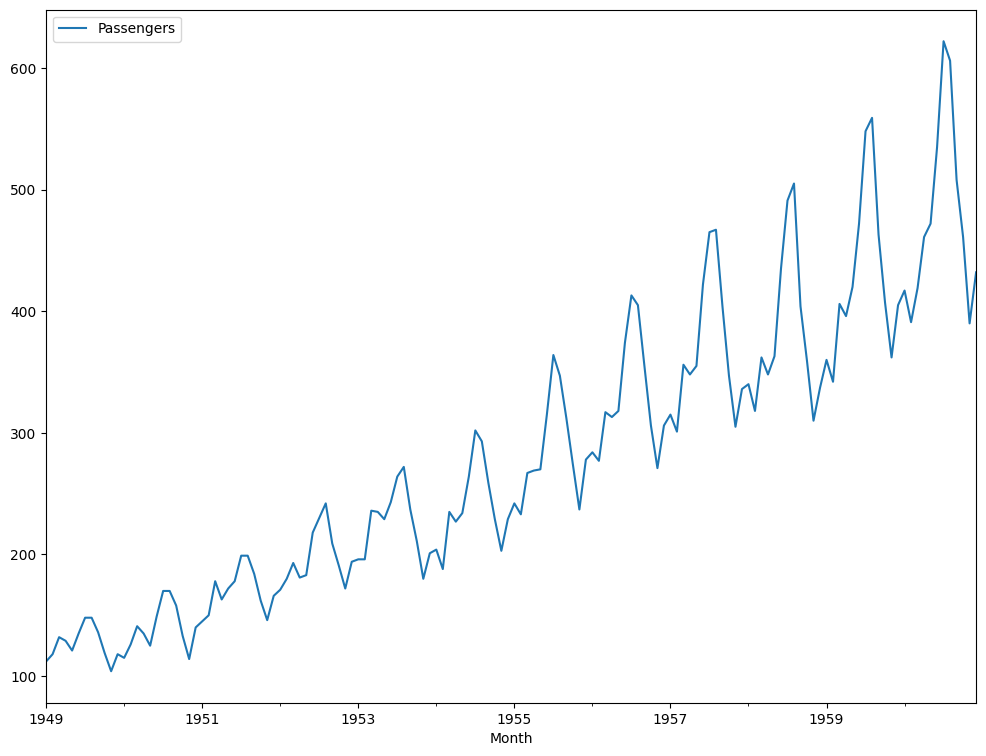

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

# データセットの読み込み
df = pd.read_csv(
    "./data/AirPassengers.csv",
    dtype={"Passengers": "float"},
    index_col="Month",  # 変数「Month」をインデックスに設定
    parse_dates=True,
)  # インデックスを日付型に設定
df.head()  # 確認
df.plot()


In [2]:
df_std =  stats.zscore(df)
df_std.head()

,Passengers
Month,
1949-01-01,-1.407779
1949-02-01,-1.357590
1949-03-01,-1.240483
1949-04-01,-1.265578
1949-05-01,-1.332496


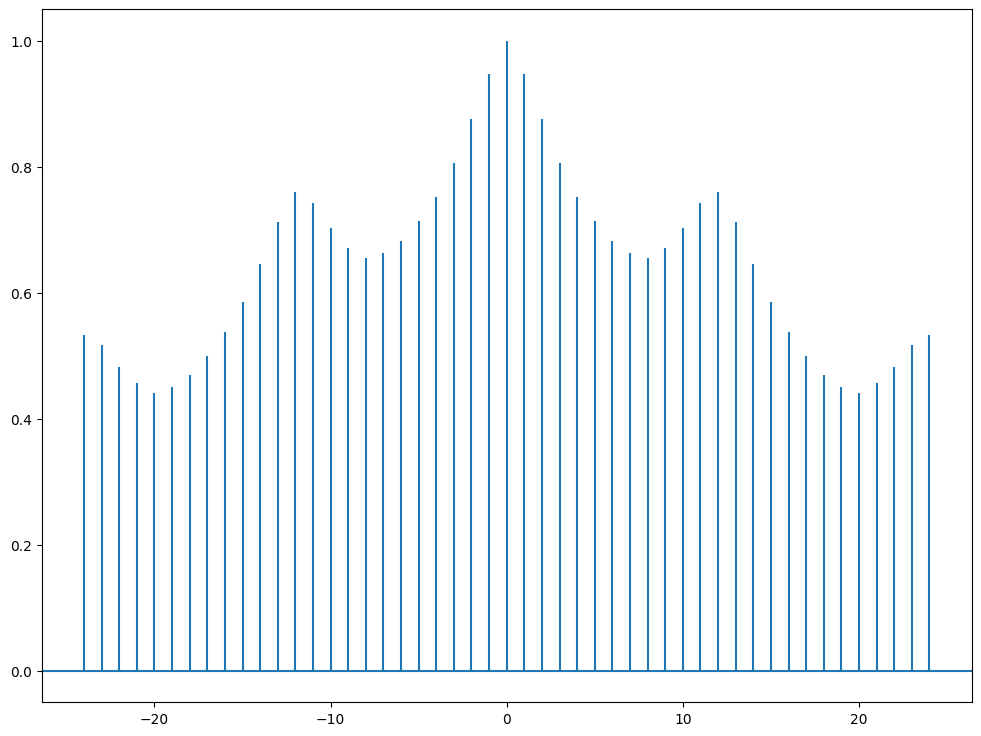

In [3]:
# 自己相関コレログラム（原系列）
acor_value = plt.acorr(df_std["Passengers"], detrend=mlab.detrend_none, maxlags=24)
plt.show()


In [4]:
# 自己相関の値
acor_pd = pd.DataFrame(acor_value[1], acor_value[0])
acor_pd.index.name = "lag"
acor_pd.columns = ["acor"]
acor_pd.head()

,acor
lag,
-24,0.532190
-23,0.517127
-22,0.482482
-21,0.457224
-20,0.441629
